In [3]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/216?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 4836
Some examples: [('苜蓿芽', '番茄丁'), ('苜蓿芽', '牛頭牌咖哩炒醬'), ('苜蓿芽', '米血糕'), ('苜蓿芽', '沙茶醬'), ('苜蓿芽', '花生粉'), ('苜蓿芽', '蒜泥')]


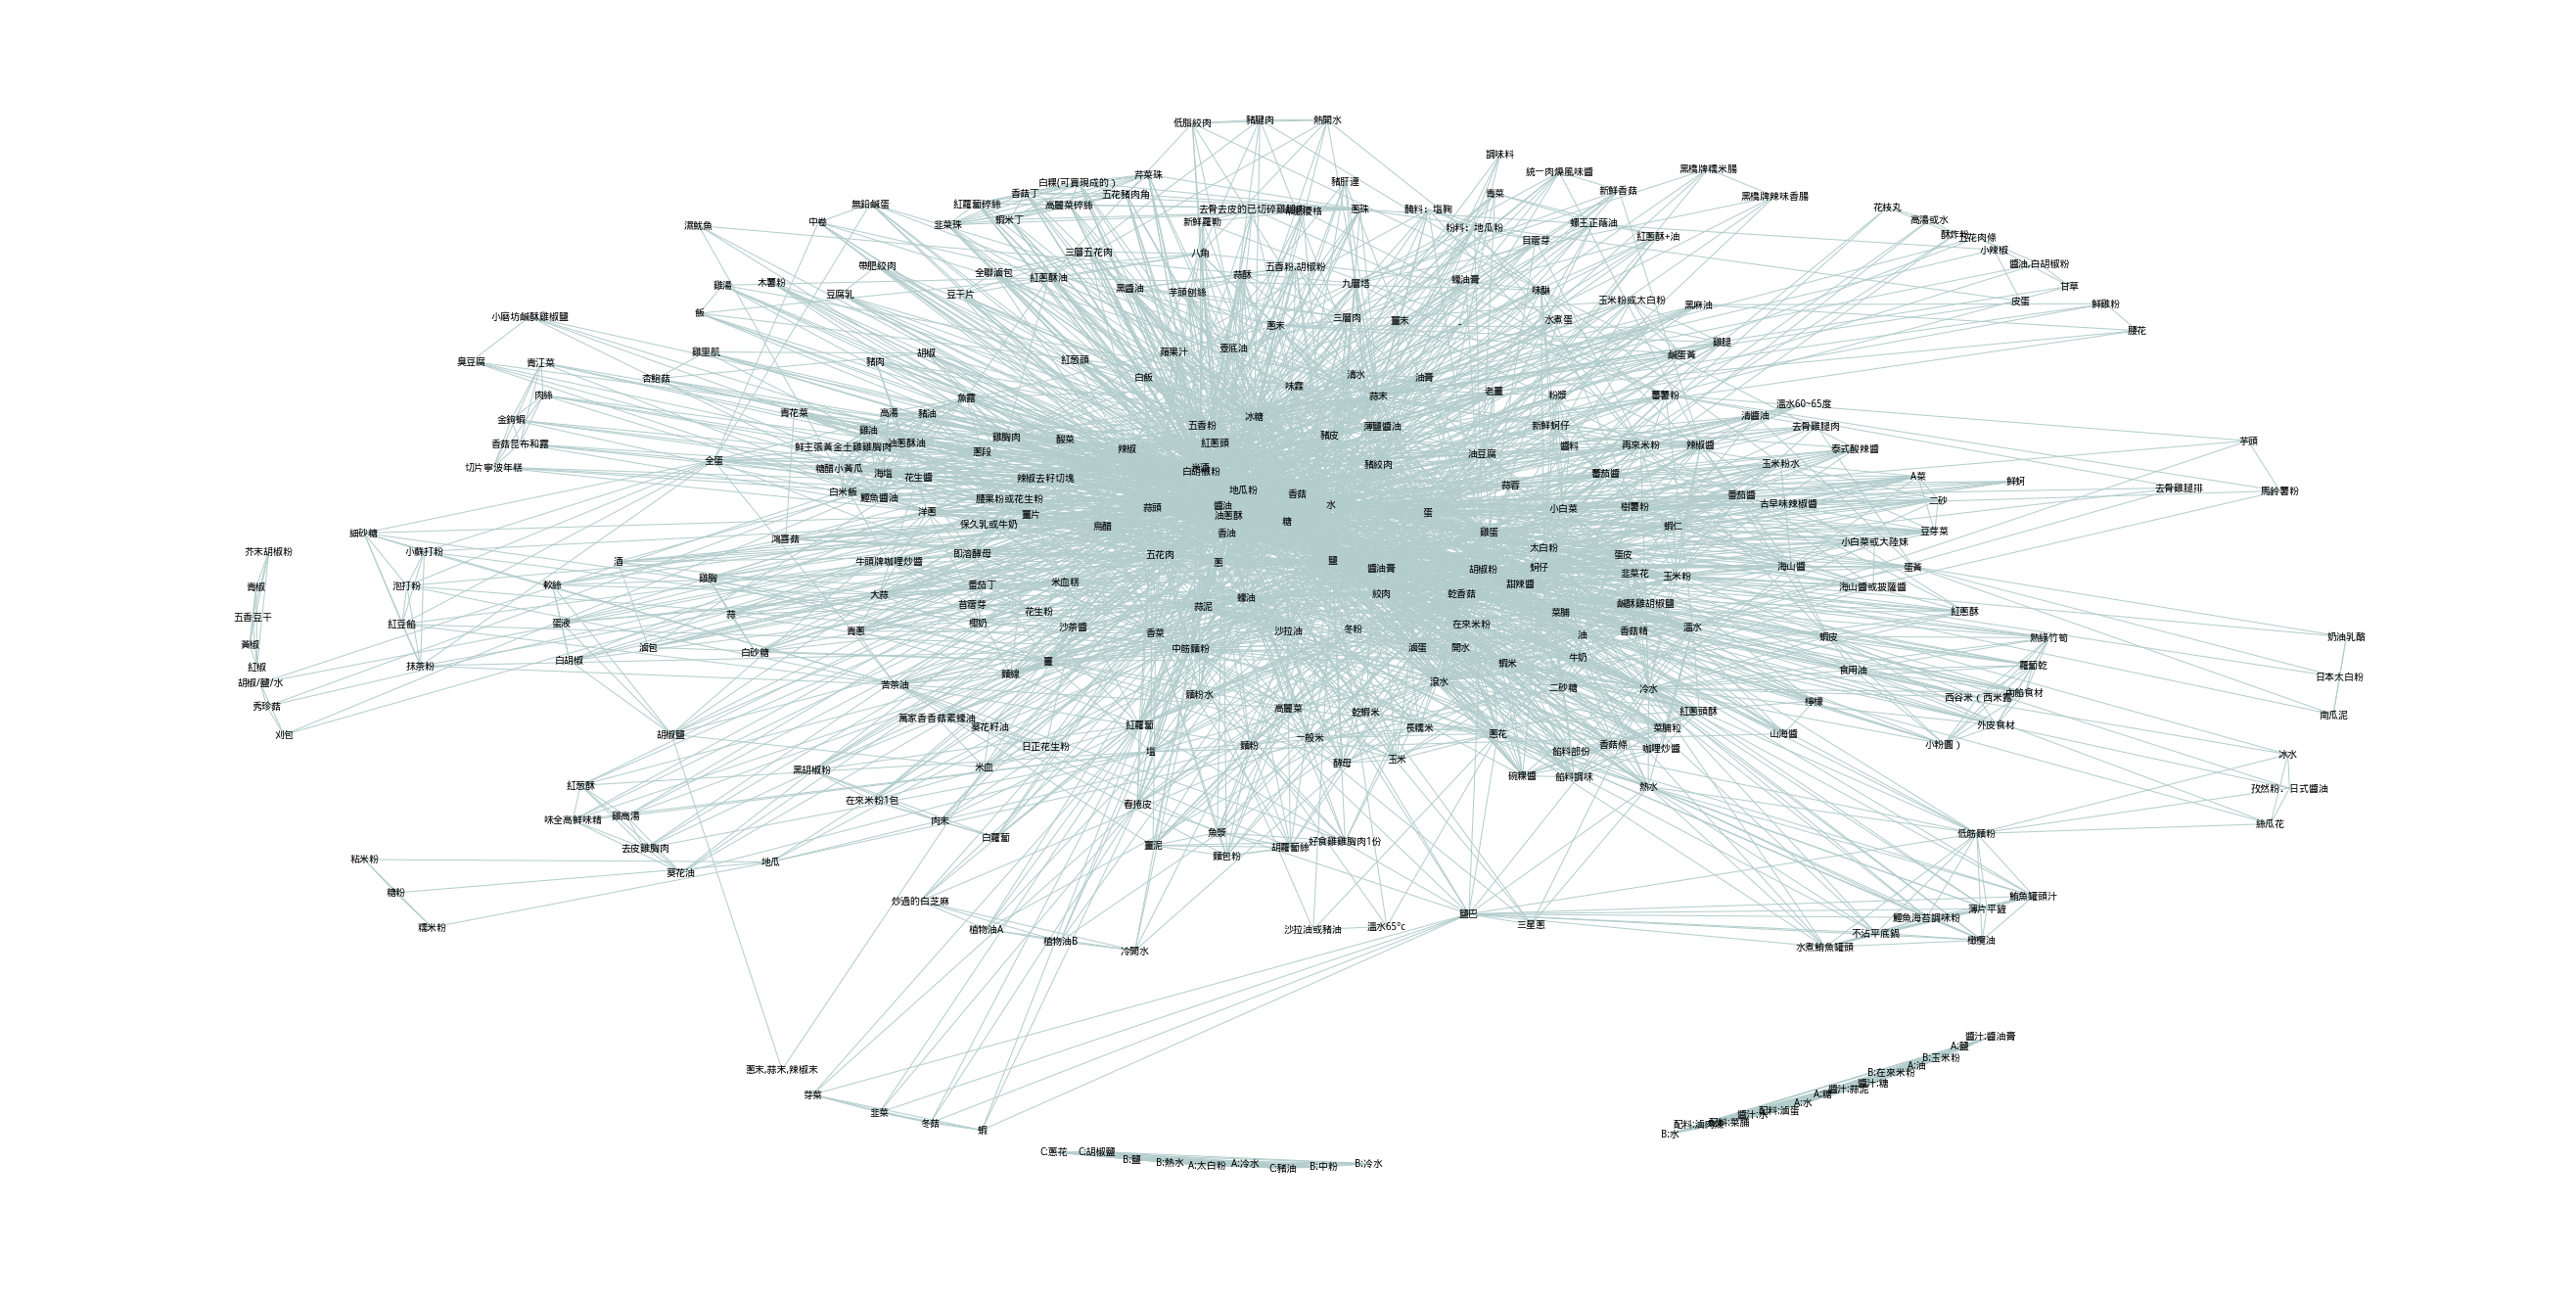

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('taiwan_recipe.png', dpi=100)

In [5]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('醬油', 175), ('米酒', 152), ('鹽', 143), ('水', 125), ('胡椒粉', 115), ('糖', 105), ('油蔥酥', 100), ('蒜頭', 82), ('白胡椒粉', 81), ('冰糖', 75), ('醬油膏', 68), ('雞蛋', 63), ('五香粉', 63), ('蒜末', 63), ('蔥', 63)]

Closeness centrality: [('醬油', 0.6387793306467747), ('米酒', 0.6062030011459414), ('鹽', 0.5969378897747153), ('水', 0.5672148413212025), ('胡椒粉', 0.5590952014658886), ('糖', 0.5435339036119674), ('油蔥酥', 0.541381294092712), ('蒜頭', 0.5257645259938838), ('白胡椒粉', 0.5197672120091628), ('冰糖', 0.5129410009696428), ('醬油膏', 0.5072310825915021), ('蔥', 0.5044235304738368), ('香油', 0.502569032200036), ('地瓜粉', 0.5007281199941751), ('五香粉', 0.5007281199941751)]

Degree centrality: [('醬油', 0.5351681957186545), ('米酒', 0.4648318042813456), ('鹽', 0.43730886850152906), ('水', 0.382262996941896), ('胡椒粉', 0.3516819571865443), ('糖', 0.3211009174311927), ('油蔥酥', 0.3058103975535168), ('蒜頭', 0.25076452599388377), ('白胡椒粉', 0.24770642201834864), ('冰糖', 0.22935779816513763), ('醬油膏', 0.20795107033639143), ('雞蛋', 0.1926605504587

In [6]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 53628.0
Total edges in the graph: 3039
Density: 0.0567

Name: 
Type: Graph
Number of nodes: 328
Number of edges: 3039
Average degree:  18.5305


In [7]:
occurence = [(g[0], len(list(g[1]))) for g in itertools.groupby(result)]
num = 0
for k in occurence:
    num = num + k[1]
print(num)
sorted(occurence, key = lambda x : x[1], reverse = True)[:10]

4836


[(('-', '-'), 10),
 (('豬絞肉', '-'), 5),
 (('油蔥酥', '-'), 5),
 (('水', '-'), 5),
 (('調味料', '-'), 5),
 (('蝦仁', '太白粉'), 2),
 (('小白菜', '太白粉'), 2),
 (('蛋', '太白粉'), 2),
 (('蝦仁', '太白粉'), 2),
 (('小白菜', '太白粉'), 2)]

In [8]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

175


In [9]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.4814
